# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Data Reading and cleaning

In [2]:
df = pd.read_csv("spam.csv",encoding='latin-1')#,lines = True)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df=df.dropna(how="any",axis=1)

In [6]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [7]:
df.columns = ["Label","Message"]

In [8]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df["Num_Length"]=df["Message"].apply(lambda x : len(x))

In [10]:
# checking for duplicates
df.duplicated().sum()

403

In [11]:
# droping duplicates
df = df.drop_duplicates(keep='first')

In [12]:
df.head()

,Label,Message,Num_Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
df.shape

(5169, 3)

# 2. EDA

In [14]:
df['Label'].value_counts()

ham     4516
spam     653
Name: Label, dtype: int64

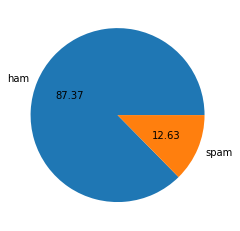

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['Label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

<AxesSubplot: xlabel='Label', ylabel='Num_Length'>

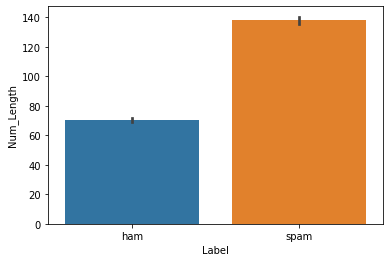

In [16]:
import seaborn as sns
sns.barplot(data=df,x="Label",y="Num_Length")

<AxesSubplot: ylabel='Frequency'>

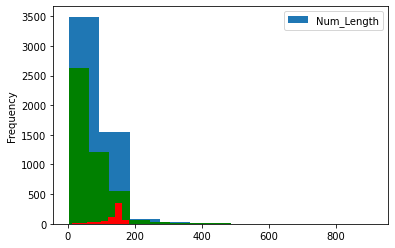

In [17]:
df.plot(kind='hist')
df[df.Label == "ham"].Num_Length.plot(bins=15,label='Ham',kind = 'hist',color = 'green')
df[df.Label == "spam"].Num_Length.plot(kind = 'hist',color = 'red')

In [18]:
from nltk.tokenize import word_tokenize,sent_tokenize
df['num_words'] = df['Message'].apply(lambda x:len(word_tokenize(x)))
df['num_sentences'] = df['Message'].apply(lambda x:len(sent_tokenize(x)))


In [19]:
df.head()

,Label,Message,Num_Length,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
#  labeling the categorical column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Label'])
df.head()

,Label,Message,Num_Length,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[['Num_Length','num_words','num_sentences']].describe()

,Num_Length,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [22]:
# ham
df[df['Label'] == 0][['Num_Length','num_words','num_sentences']].describe()

,Num_Length,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [23]:
# spam 
df[df['Label'] == 1][['Num_Length','num_words','num_sentences']].describe()

,Num_Length,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


# 3. Data Preprocessing
#### Lower case/Text Standardization
#### Tokenization
#### Removing special characters
#### Removing stop words and punctuation
#### Stemming

### Lower case/Text Standardization

In [24]:
messages=df.Message.values

messages_new=[m.lower() for m in messages]
messages_new[:2]

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...',
 'ok lar... joking wif u oni...']

### Remove specail charecter

In [25]:
import re
# \w={a-zA-Z0-9_}
# \W=other than \w
messages_re=[re.sub('\W',' ',m) for m in messages_new]
messages_re[:3]

['go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   ',
 'ok lar    joking wif u oni   ',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005  text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s']

In [26]:
# removing multiple white spaces to single space
messages_re=[re.sub('\s+',' ',m).strip() for m in messages_re]
messages_re[:3]

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s']

### Remove Stops word

In [27]:
# 1 using nltk stop word packkages

from nltk.corpus import stopwords
sw=stopwords.words('english')
# sw

In [28]:
messages_without_sw=[]
for msg in messages_re:
    msg_cleaned=[]
    for m in msg.split():
        if m not in sw:
            msg_cleaned.append(m)
    messages_without_sw.append(' '.join(msg_cleaned))

In [29]:
messages_without_sw[:4]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18',
 'u dun say early hor u c already say']

In [30]:
# removing digits
messages_without_sw_digits=[re.sub('\d+','',m) for m in messages_without_sw]
messages_without_sw_digits[:4]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry  wkly comp win fa cup final tkts st may  text fa  receive entry question std txt rate c apply over',
 'u dun say early hor u c already say']

In [31]:
# removing single or double charecter words
messages_without_sw=[re.sub('\s\w{1,2}\s','',m) for m in messages_without_sw_digits]
messages_without_sw[:4]

['go jurong point crazy available bugisgreat worlde buffet cine got amore wat',
 'ok lar joking wifoni',
 'free entry  wkly comp wincup final tktsmay  text receive entry question std txt rateapply over',
 'u dun say early horc already say']

In [32]:
# removing single or double charecter words
messages_without_sw=[re.sub('\s\w{1,2}\s','',m) for m in messages_without_sw_digits]
messages_without_sw[:4]

['go jurong point crazy available bugisgreat worlde buffet cine got amore wat',
 'ok lar joking wifoni',
 'free entry  wkly comp wincup final tktsmay  text receive entry question std txt rateapply over',
 'u dun say early horc already say']

In [34]:
# # removing single or double charecter words at starting and ending
messages_without_sw_cleaned=[re.sub('^\w{1,2}\s','',m) for m in messages_without_sw]
messages_without_sw_cleaned[:4]

['jurong point crazy available bugisgreat worlde buffet cine got amore wat',
 'lar joking wifoni',
 'free entry  wkly comp wincup final tktsmay  text receive entry question std txt rateapply over',
 'dun say early horc already say']

In [35]:
# # removing single or double charecter words at ending
messages_without_sw_cleaned=[re.sub('\s\w{1,2}$','',m) for m in messages_without_sw_cleaned]
messages_without_sw_cleaned[:4]

['jurong point crazy available bugisgreat worlde buffet cine got amore wat',
 'lar joking wifoni',
 'free entry  wkly comp wincup final tktsmay  text receive entry question std txt rateapply over',
 'dun say early horc already say']

In [36]:
# removing multipole spaces
messages_without_sw_cleaned=[re.sub('\s+',' ',m).strip() for m in messages_without_sw_cleaned]
messages_without_sw_cleaned[:4]

['jurong point crazy available bugisgreat worlde buffet cine got amore wat',
 'lar joking wifoni',
 'free entry wkly comp wincup final tktsmay text receive entry question std txt rateapply over',
 'dun say early horc already say']

### Stemming and lemmatization

In [37]:

from nltk.stem import PorterStemmer,WordNetLemmatizer

In [38]:
ps=PorterStemmer()
lm=WordNetLemmatizer()

In [39]:
message_stem=[]
message_lem=[]
for msg in messages_without_sw_cleaned:
    msg_stem=[]
    msg_lem=[]
    for m in word_tokenize(msg):
        msg_stem.append(ps.stem(m))
        msg_lem.append(lm.lemmatize(m))
    message_stem.append(' '.join(msg_stem))
    message_lem.append(' '.join(msg_lem))

In [40]:
for m1,m2,m3 in zip(messages_without_sw_cleaned[:4],message_stem[:4],message_lem[:4]):
    print(m1)
    print(m2)
    print(m3)
    print("##################################")

jurong point crazy available bugisgreat worlde buffet cine got amore wat
jurong point crazi avail bugisgreat world buffet cine got amor wat
jurong point crazy available bugisgreat worlde buffet cine got amore wat
##################################
lar joking wifoni
lar joke wifoni
lar joking wifoni
##################################
free entry wkly comp wincup final tktsmay text receive entry question std txt rateapply over
free entri wkli comp wincup final tktsmay text receiv entri question std txt rateappli over
free entry wkly comp wincup final tktsmay text receive entry question std txt rateapply over
##################################
dun say early horc already say
dun say earli horc alreadi say
dun say early horc already say
##################################


In [41]:
df['stemmed_Message']=message_stem

In [42]:
df.head()

,Label,Message,Num_Length,num_words,num_sentences,stemmed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,jurong point crazi avail bugisgreat world buff...
1,0,Ok lar... Joking wif u oni...,29,8,2,lar joke wifoni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp wincup final tktsmay text...
3,0,U dun say so early hor... U c already then say...,49,13,1,dun say earli horc alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

## Vectorisation 

In [43]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
c_vect=CountVectorizer()
t_vect=TfidfVectorizer(max_features=3000)

In [50]:
# applying count vectorisaion
x=t_vect.fit_transform(df['stemmed_Message']).toarray()

In [51]:
text.shape

(5169, 3000)

In [52]:
y = df['Label'].values

##  train_test_split

In [53]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [57]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [58]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

## Gaussian NB

In [59]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8297872340425532
[[747 149]
 [ 27 111]]
0.4269230769230769


## Multinomial NB

In [60]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
[[895   1]
 [ 32 106]]
0.9906542056074766


## Bernauli NB

In [61]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9758220502901354
[[892   4]
 [ 21 117]]
0.9669421487603306


# Pickling

In [102]:
import pickle

pickle.dump(t_vect,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [63]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)

In [64]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    }

In [65]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [66]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9700193423597679
Precision -  0.9421487603305785
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9680851063829787
Precision -  0.9906542056074766
For  DT
Accuracy -  0.9361702127659575
Precision -  0.86
For  LR
Accuracy -  0.9555125725338491
Precision -  0.9339622641509434
For  RF
Accuracy -  0.965183752417795
Precision -  0.9811320754716981
For  AdaBoost
Accuracy -  0.9564796905222437
Precision -  0.9345794392523364
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8790322580645161


In [67]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [68]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.968085,0.990654
5,RF,0.965184,0.981132
0,SVC,0.970019,0.942149
6,AdaBoost,0.956480,0.934579
4,LR,0.955513,0.933962
7,BgC,0.957447,0.879032
3,DT,0.936170,0.860000


In [69]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [70]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.968085
2,RF,Accuracy,0.965184
3,SVC,Accuracy,0.970019
4,AdaBoost,Accuracy,0.956480
5,LR,Accuracy,0.955513
6,BgC,Accuracy,0.957447
7,DT,Accuracy,0.936170
8,KN,Precision,1.000000
9,NB,Precision,0.990654


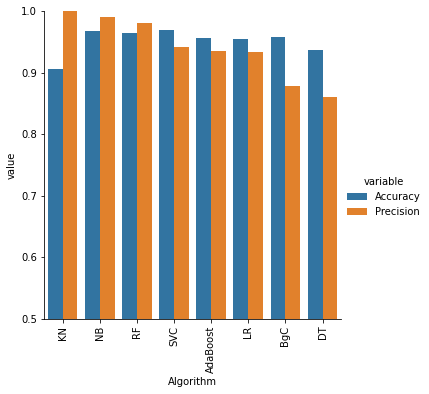

In [75]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Voting Classifier

In [92]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rf=RandomForestClassifier()

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb),('rf',rf)],voting='soft')

In [93]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [94]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.9830508474576272


# Applying stacking

In [97]:
estimators =[('svm', svc), ('nb', mnb),('rf',rf)]
final_estimator=RandomForestClassifier()

In [98]:
from sklearn.ensemble import StackingClassifier

In [99]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [100]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9682539682539683
